<a href="https://colab.research.google.com/github/raunakyadav92/Advance-python/blob/main/Advance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q1. Create a file that contains 1000 lines of random strings.
import random
import string

# Function to generate random string
def generate_random_string(length=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Create file with 1000 lines
with open('random_strings_1000.txt', 'w') as f:
    for _ in range(1000):
        f.write(generate_random_string(20) + '\n')

print("File with 1000 random strings created successfully.")


File with 1000 random strings created successfully.


In [ ]:
#Q2. Create a file that contains multiple lines of random strings and file size must be 5 MB.
import os

filename = 'random_5MB.txt'
target_size = 5 * 1024 * 1024  # 5 MB

with open(filename, 'w') as f:
    while f.tell() < target_size:
        f.write(generate_random_string(100) + '\n')

print(f"File {filename} of size approx 5MB created successfully.")


File random_5MB.txt of size approx 5MB created successfully.


In [ ]:
#Q3. Create 10 files that contain multiple lines of random strings and file size of each file must be 5 MB.
for i in range(1, 11):
    filename = f'random_5MB_file_{i}.txt'
    with open(filename, 'w') as f:
        while f.tell() < target_size:
            f.write(generate_random_string(100) + '\n')
    print(f"File {filename} created.")


File random_5MB_file_1.txt created.
File random_5MB_file_2.txt created.
File random_5MB_file_3.txt created.
File random_5MB_file_4.txt created.
File random_5MB_file_5.txt created.
File random_5MB_file_6.txt created.
File random_5MB_file_7.txt created.
File random_5MB_file_8.txt created.
File random_5MB_file_9.txt created.
File random_5MB_file_10.txt created.


In [ ]:
#Q4. Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.
import random
import string

# Function to generate random string
def generate_random_string(length=100):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

sizes_gb = [1, 2, 3, 4, 5]

for size in sizes_gb:
    filename = f'random_{size}GB.txt'
    target_size = size * 1024 * 1024 * 1024  # GB to Bytes

    with open(filename, 'w', buffering=1024*1024) as f:  # Large buffer to speed up writing
        written = 0
        line_size = 100 + 1  # 100 characters + newline

        while written < target_size:
            f.write(generate_random_string(100) + '\n')
            written += line_size

    print(f"File {filename} of size ~{size}GB created.")


File random_1GB.txt of size ~1GB created.
File random_2GB.txt of size ~2GB created.
File random_3GB.txt of size ~3GB created.
File random_4GB.txt of size ~4GB created.
File random_5GB.txt of size ~5GB created.


In [ ]:
#Q5. Convert all the files of Q4 into upper case one by one.
sizes_gb = [1, 2, 3, 4, 5]
for size in sizes_gb:
    filename = f'random_{size}GB.txt'
    output_filename = f'random_{size}GB_upper.txt'
    with open(filename, 'r') as f_in, open(output_filename, 'w') as f_out:
        for line in f_in:
            f_out.write(line.upper())
    print(f"Converted {filename} to upper case.")


Converted random_1GB.txt to upper case.
Converted random_2GB.txt to upper case.
Converted random_3GB.txt to upper case.
Converted random_4GB.txt to upper case.
Converted random_5GB.txt to upper case.


In [ ]:
#Q6. Convert all the files of Q4 into upper case parallel using multi-threading.
import threading

def convert_to_upper(size):
    filename = f'random_{size}GB.txt'
    output_filename = f'random_{size}GB_upper.txt'
    with open(filename, 'r') as f_in, open(output_filename, 'w') as f_out:
        for line in f_in:
            f_out.write(line.upper())
    print(f"Converted {filename} to upper case.")

threads = []

for size in sizes_gb:
    t = threading.Thread(target=convert_to_upper, args=(size,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()


Exception in thread Thread-12 (convert_to_upper):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-3-54301612>", line 7, in convert_to_upper
FileNotFoundError: [Errno 2] No such file or directory: 'random_5GB.txt'


Converted random_1GB.txt to upper case.
Converted random_2GB.txt to upper case.
Converted random_4GB.txt to upper case.
Converted random_3GB.txt to upper case.


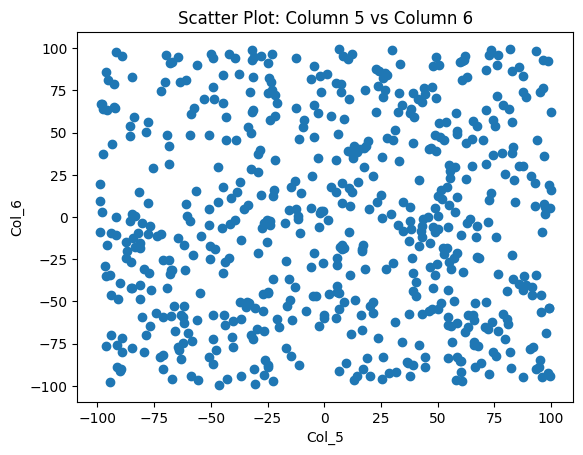

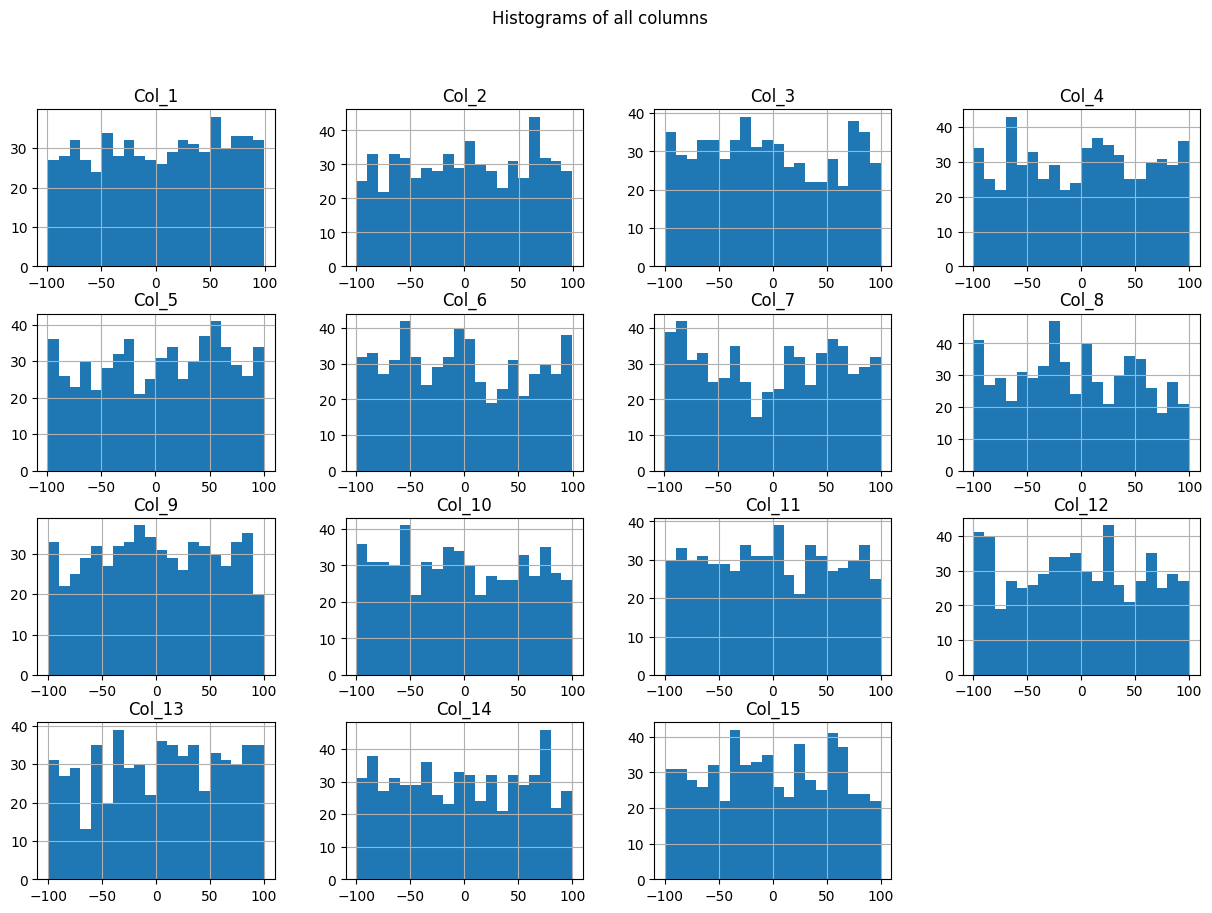

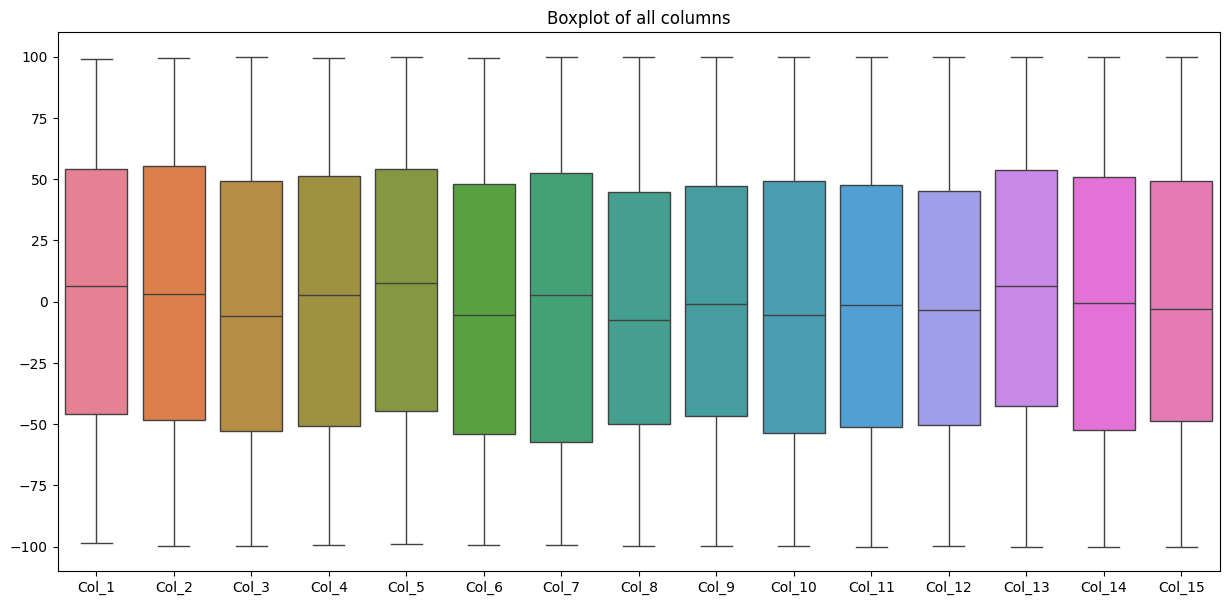

In [ ]:
#Q14. Random dataset of 600 rows & 15 columns, values: [-100,100]
#(i) Scatter plot (Col 5 vs Col 6)
#(ii) Histogram
#(iii) Box plot



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate dataset
data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(15)])

# (i) Scatter plot between Col_5 and Col_6
plt.scatter(df['Col_5'], df['Col_6'])
plt.title("Scatter Plot: Column 5 vs Column 6")
plt.xlabel("Col_5")
plt.ylabel("Col_6")
plt.show()

# (ii) Histograms of all columns
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of all columns")
plt.show()

# (iii) Box plot of all columns
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)
plt.title("Boxplot of all columns")
plt.show()


In [ ]:
#Q15. Random dataset of 500 rows & 5 columns, values: [5,10]
#(i) t-Test
#(ii) Wilcoxon Signed Rank Test
#(iii) Two Sample t-Test & Wilcoxon Rank Sum Test (Col 3 vs Col 4)
import numpy as np   # <-- You missed this line
import pandas as pd
from scipy import stats

# Generate dataset
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(5)])

# (i) One-sample t-test (against mean=7.5 for example)
for col in df.columns:
    t_stat, p_val = stats.ttest_1samp(df[col], popmean=7.5)
    print(f"{col} t-test: t={t_stat:.4f}, p={p_val:.4f}")

# (ii) Wilcoxon Signed Rank Test (against median=7.5)
for col in df.columns:
    wilcoxon = stats.wilcoxon(df[col]-7.5)
    print(f"{col} Wilcoxon Signed Rank Test: statistic={wilcoxon.statistic}, p={wilcoxon.pvalue}")

# (iii) Two Sample t-Test & Wilcoxon Rank Sum Test between Col_3 & Col_4
t_stat, p_val = stats.ttest_ind(df['Col_3'], df['Col_4'])
print(f"Two sample t-test between Col_3 & Col_4: t={t_stat:.4f}, p={p_val:.4f}")

rank_sum = stats.ranksums(df['Col_3'], df['Col_4'])
print(f"Wilcoxon Rank Sum Test between Col_3 & Col_4: statistic={rank_sum.statistic}, p={rank_sum.pvalue}")



Col_1 t-test: t=-2.0203, p=0.0439
Col_2 t-test: t=-1.9926, p=0.0469
Col_3 t-test: t=-0.8344, p=0.4044
Col_4 t-test: t=-2.3487, p=0.0192
Col_5 t-test: t=-0.2296, p=0.8185
Col_1 Wilcoxon Signed Rank Test: statistic=56061.0, p=0.04228186707055445
Col_2 Wilcoxon Signed Rank Test: statistic=56158.0, p=0.04542194477938395
Col_3 Wilcoxon Signed Rank Test: statistic=60046.0, p=0.42494175112922283
Col_4 Wilcoxon Signed Rank Test: statistic=55105.0, p=0.019992034983418106
Col_5 Wilcoxon Signed Rank Test: statistic=61809.0, p=0.800693481177726
Two sample t-test between Col_3 & Col_4: t=1.0717, p=0.2841
Wilcoxon Rank Sum Test between Col_3 & Col_4: statistic=1.0747516833293078, p=0.28248591766202136


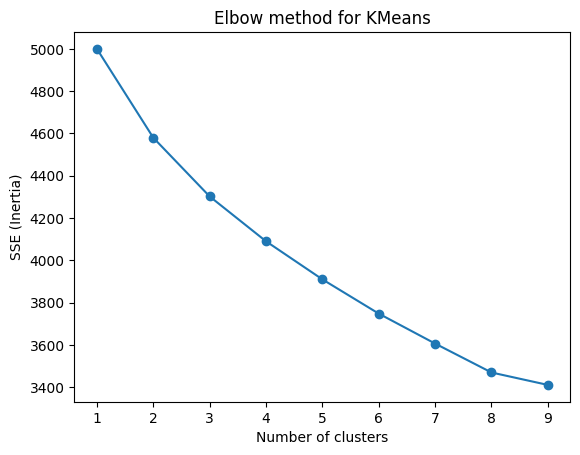

K=2, Silhouette Score=0.0803806502835566
K=3, Silhouette Score=0.0740047571518314
K=4, Silhouette Score=0.07477958585745162
K=5, Silhouette Score=0.07399349389756958
K=6, Silhouette Score=0.07946363367685225
K=7, Silhouette Score=0.08177502526169105
K=8, Silhouette Score=0.0863108496655833
K=9, Silhouette Score=0.08360276519547336


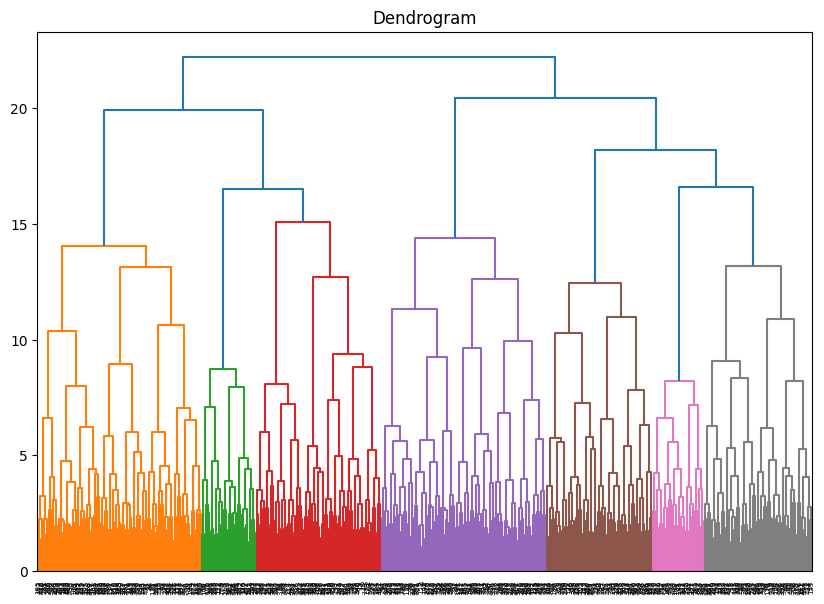

In [ ]:
#Q13. Random dataset of 500 rows & 10 columns for Clustering
#(i) K-Means
#(ii) Hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Generate dataset
data = np.hstack([
    np.random.uniform(-10, 10, size=(500, 4)),
    np.random.uniform(10, 20, size=(500, 4)),
    np.random.uniform(-100, 100, size=(500, 2))
])

df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(10)])

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

### (i) KMeans Clustering
# Elbow method
sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow method for KMeans')
plt.show()

# Silhouette Score for optimal k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"K={k}, Silhouette Score={score}")

### (ii) Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()


<ipython-input-10-3945752219>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.mask(df.applymap(lambda x: 10 <= x <= 60))


Rows having missing values:
9     16
7     15
6     15
8     14
4     10
10     9
11     8
5      5
12     3
3      2
13     2
15     1
Name: count, dtype: int64


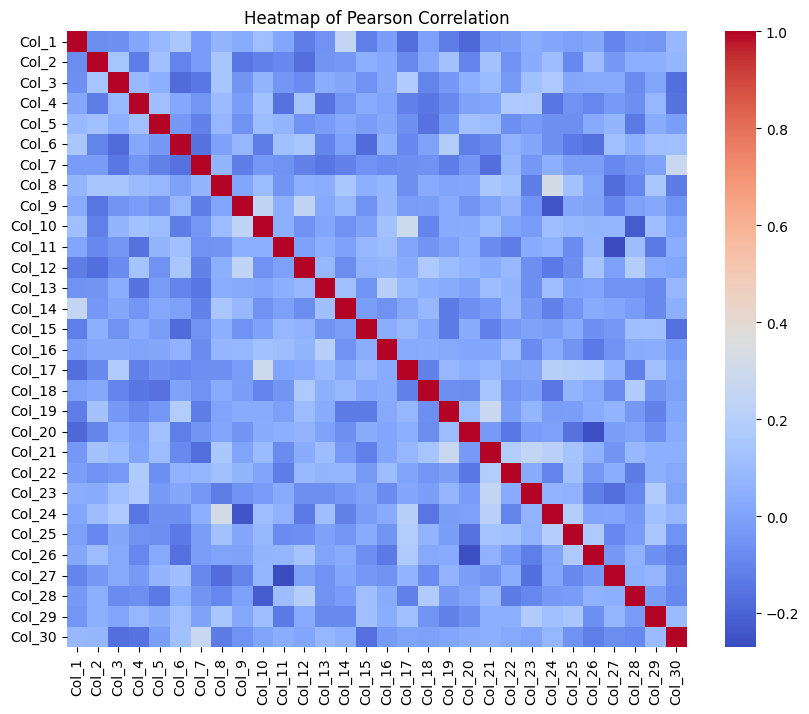

Columns with correlation ≤ 0.7:
[]
Final transformed dataset:
   Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  ...  \
0      0      0      0      0      0      0      0      0      0       0  ...   
1      0      0      0      0      0      0      0      0      0       0  ...   
2      0      0      0      0      0      1      0      0      0       0  ...   
3      0      0      0      0      0      0      0      0      0       0  ...   
4      0      0      0      0      0      0      0      0      0       0  ...   

   Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  Col_29  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       1       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       1       0   
4       0       0       0       0       0       0       0       0 

<ipython-input-10-3945752219>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_norm.applymap(lambda x: 1 if x <= 0.5 else 0)


In [ ]:
#Q12. Create a random dataset of 100 rows and 30 columns. Values: [1, 200]
#(i) Replace values in [10, 60] with NA; print rows having missing values
#(ii) Replace NA with column average
#(iii) Pearson correlation, heatmap & select columns having correlation ≤ 0.7
#(iv) Normalize between 0 and 10
#(v) Replace values: 1 if ≤ 0.5 else 0


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate dataset
np.random.seed(42)
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(30)])

# (i) Replace values in [10, 60] with NA
df = df.mask(df.applymap(lambda x: 10 <= x <= 60))
print("Rows having missing values:")
print(df.isnull().sum(axis=1).value_counts())

# (ii) Replace NA with column mean
df = df.fillna(df.mean())

# (iii) Pearson correlation, heatmap, columns with correlation ≤ 0.7
corr = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Heatmap of Pearson Correlation")
plt.show()

# Selecting columns with correlation ≤ 0.7 with others
low_corr_cols = [col for col in corr.columns if all(abs(corr[col]) <= 0.7)]
print("Columns with correlation ≤ 0.7:")
print(low_corr_cols)

# (iv) Normalize between 0 and 10
df_norm = (df - df.min()) / (df.max() - df.min()) * 10

# (v) Replace with 1 if value ≤ 0.5 else 0
df_binary = df_norm.applymap(lambda x: 1 if x <= 0.5 else 0)

print("Final transformed dataset:")
print(df_binary.head())
